In [83]:
import numpy as np
import math
import cvxpy as cp
import matplotlib.pyplot as plt

In [3]:
x1 = np.ones(10)
A_k = [np.zeros((10,10)),
          np.zeros((10,10)),
          np.zeros((10,10)), 
          np.zeros((10,10)),
          np.zeros((10,10))]
b_k = [np.zeros(10),
       np.zeros(10),
       np.zeros(10),
       np.zeros(10),
       np.zeros(10)]

In [4]:
#### create A matrices
# create upper right triangle
for k in range(5):
    for i in range(10):
        for j in range(10):
            if i < j:
                A_k[k][i,j] = math.exp((i+1)/(j+1))*math.cos((i+1)*(j+1))*math.sin(k+1)
# create lower left triangle
for k in range(5):
    A_k[k] = A_k[k] + np.transpose(A_k[k])
# create the diagonal entries    
for k in range(5):
    for i in range(10):
        A_k[k][i,i] = (i+1)/10*abs(math.sin(k+1)) + np.sum(abs(A_k[k]))

In [5]:
#### create b vectors
for k in range(5):
    for i in range(10):
        b_k[k][i] = math.exp((i+1)/(k+1))*math.sin((i+1)*(k+1))

In [63]:
def f(x):
    fs = [x.dot(A_k[k]).dot(x) - b_k[k].dot(x) for k in range(5)]
    return [max(fs), np.argmax(fs)]

def g(x,k):
    return 2*A_k[k].dot(x) - b_k[k]

f(x1)

[93892.24535102755, 4]

In [10]:
## solve optimization problem
z = cp.Variable(1)
x = cp.Variable(10)
obj = cp.Minimize(z)
constraints = [cp.quad_form(x,A_k[0]) <= z,
              cp.quad_form(x,A_k[1]) <= z,
              cp.quad_form(x,A_k[2]) <= z,
              cp.quad_form(x,A_k[3]) <= z,
              cp.quad_form(x,A_k[4]) <= z]
prob = cp.Problem(obj, constraints)
prob.solve()

-1.9362850055881713e-11

In [16]:
x_opt = x.value
opt = prob.value

Text(0.5, 1.0, 'Optimality Gap vs. No. of iterations with lr = C/sqrt(t)')

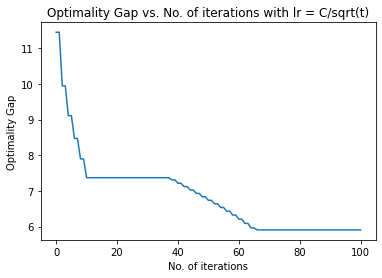

In [102]:
### learning rate = C/sqrt(t)
L = np.linalg.norm(b_k[1])
C = np.linalg.norm(x1 - x_opt,2)
xt = x1
fs = [f(x1)[0]]
best_x = x1
xt1 = x1
eps = [fs[0] - opt]
gammas = np.array([0])
for i in range(100):
    k = f(xt1)[1]
    subgrad = g(xt1,k)
#     print(xt1)
    xt = xt1 - C/np.sqrt(i+1)*subgrad/np.linalg.norm(subgrad,2)
    fs.append(f(xt)[0])
    eps.append(min(fs) - opt)
    xt1 = xt
plt.plot(range(101),np.log(eps))
plt.xlabel('No. of iterations')
plt.ylabel('Optimality Gap')
plt.title('Optimality Gap vs. No. of iterations with lr = C/sqrt(t)')

Text(0.5, 1.0, 'Optimality Gap vs. No. of iterations with Polyak learning rate')

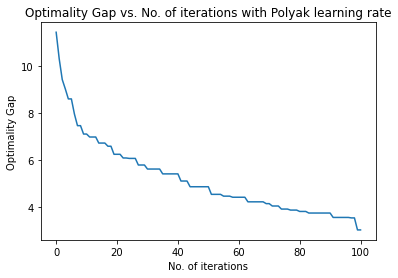

In [101]:
### Polyak learning rate
L = np.linalg.norm(b_k[1])
C = np.linalg.norm(x1 - x_opt,2)
xt = x1
fs = [f(x1)[0]]
best_x = x1
xt1 = x1
eps = [fs[0] - opt]
gammas = np.array([0])
for i in range(100):
    k = f(xt1)[1]
    subgrad = g(xt1,k)
#     print(xt1)
    xt = xt1 - (fs[-1] - opt)/np.linalg.norm(subgrad,2)*subgrad/np.linalg.norm(subgrad,2)
    fs.append(f(xt)[0])
    eps.append(min(fs) - opt)
    xt1 = xt
plt.plot(range(101),np.log(eps))
plt.xlabel('No. of iterations')
plt.ylabel('Optimality Gap')
plt.title('Optimality Gap vs. No. of iterations with Polyak learning rate')

In [61]:
L = np.linalg.norm(b_k[1])
C = L
xt = x1
best_obj = f(x1)[0]
best_x = x1
xt1 = x1
eps = [12241]
gammas = np.array([0])
i = 0
while eps[-1] > 1:
#     subgrad = g(xt1)
#     xt = xt1 - C/(np.sqrt(t)*np.linalg.norm(subgrad,2))*subgrad
    gammas = np.append(gammas,C/np.sqrt(i+1))
    eps.append(L/2*(np.linalg.norm(x1 - x_opt,2)**2 + np.sum(gammas**2))/np.sum(gammas))
    i = i + 1
    
    

KeyboardInterrupt: 

In [93]:
x = [1,2,3]
x[-1]

3